### **Veri Seti Hakkında**
Bağlam
Regresyon Algoritması hakkında daha fazla bilgi edinmek için

İçerik
Veritabanındaki her kayıt bir Boston banliyösünü veya kasabasını tanımlar. Veriler 1970 yılında Boston Standart Metropol İstatistik Alanı'ndan (SMSA) alınmıştır. Nitelikler aşağıdaki gibi tanımlanmıştır (UCI Makine Öğrenmesi Deposundan alınmıştır1): CRIM: kasaba başına düşen kişi başına düşen suç oranı


### **ZN: 25.000 ft kareden büyük parseller için imar edilmiş konut arazisinin oranı**

INDUS: Kasaba başına perakende olmayan iş dönümlerinin oranı

CHAS: Charles Nehri kukla değişkeni (= nehre komşuysa 1; aksi takdirde 0)

NOX: Nitrik oksit konsantrasyonu (10 milyonda parça)

RM: Konut başına düşen ortalama oda sayısı

AGE: 1940'tan önce inşa edilen, sahibi tarafından işgal edilen birimlerin oranı

DIS: Beş Boston istihdam merkezine olan ağırlıklı mesafeler

RAD: Radyal otoyollara erişilebilirlik endeksi

TAX: 10.000$ başına tam değerli emlak vergisi oranı

B: 1000(Bk - 0,63)², Bk, kasaba bazında [Afrika kökenli Amerikalıların] oranıdır

LSTAT: Nüfusun daha düşük statüdeki yüzdesi

MEDV: 1000$'lık ev sahibi tarafından işgal edilen evlerin medyan değeri

In [56]:
!pip install scikit-learn

In [57]:
import pandas as pd ##  data dosyalarını okumka paket
import seaborn as sns ## görselleştirme paketleri
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import r2_score ,mean_squared_error # karşlaştrıma için
from sklearn.linear_model import Ridge,Lasso,ElasticNet


pd.set_option("display.max_columns", 100)

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

import time

In [5]:
df = pd.read_csv('/content/Boston_Housing_DataSet.csv') # use pd.read_csv to read the csv file


In [6]:
df.head() # ilk 5 satır gösteriyor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.head(50) # ilk 50 satır gösteriyor  vs...

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [8]:
df.info()  ## veri hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [59]:
df.isnull().sum() ## boş değerler

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [9]:
df.describe()  ## istatistik(mean-std,min,max  vs...)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.corr(numeric_only=True) #

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


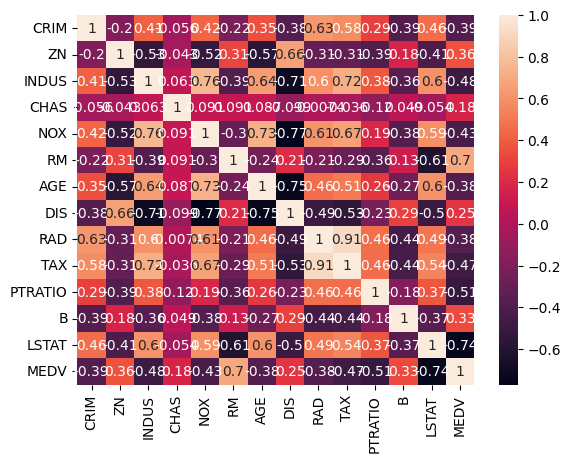

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

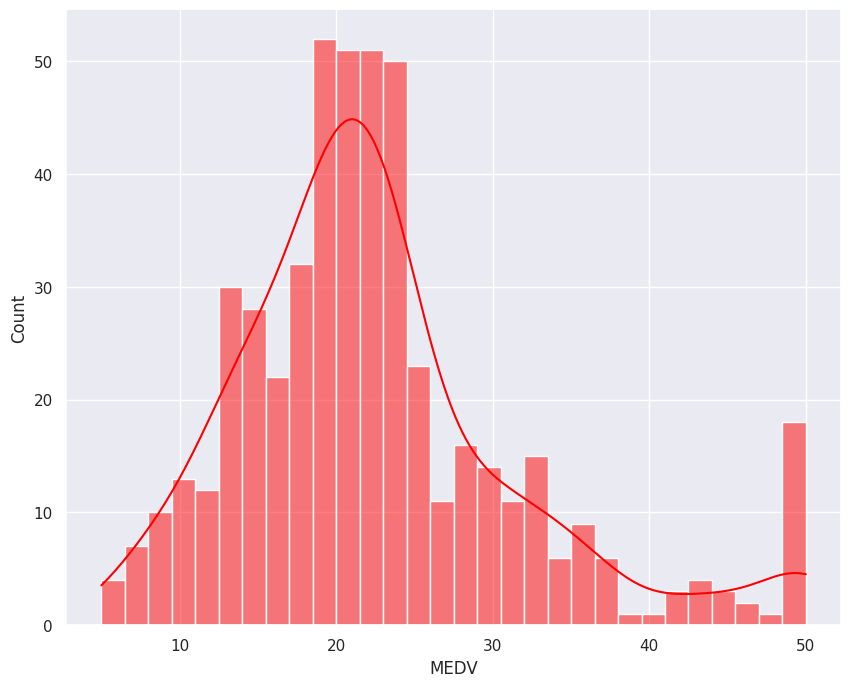

In [18]:
# plot histogram of Target col
sns.set_theme(rc={'figure.figsize':(10,8)})
sns.histplot(data=df, x=df.MEDV,bins=30,color='red', kde=True)
plt.show()

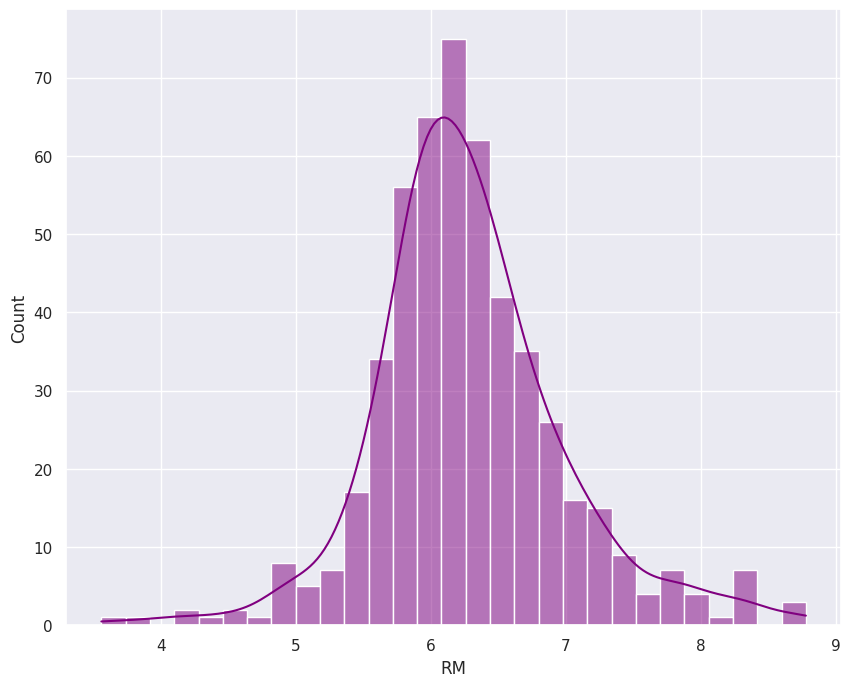

In [21]:
sns.histplot(x=df['RM'],kde=True,color='purple');

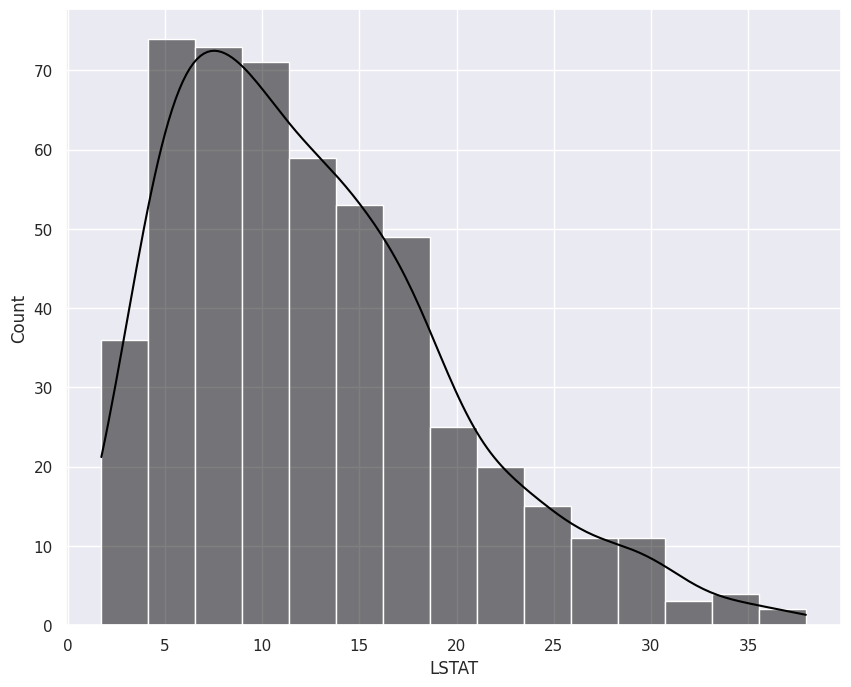

In [23]:
sns.histplot(x=df['LSTAT'],kde=True,color='black');

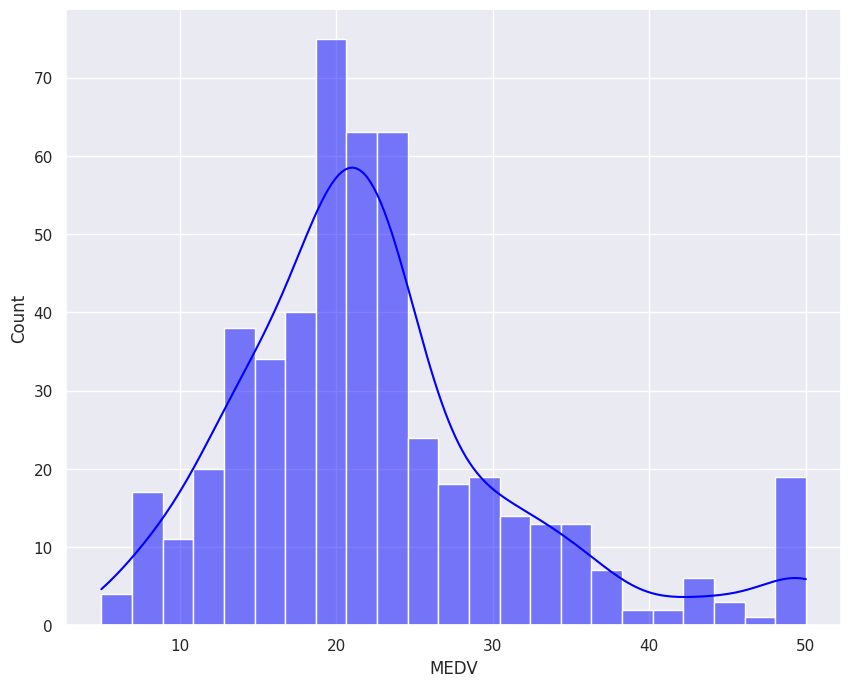

In [26]:
sns.histplot(x=df['MEDV'],kde=True,color='blue');

<Axes: xlabel='MEDV'>

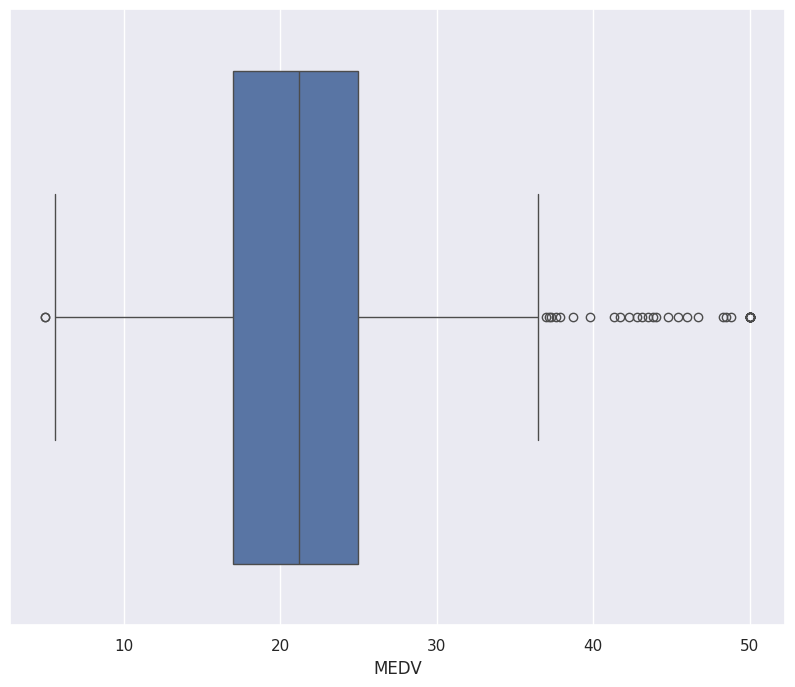

In [27]:
sns.boxplot(x=df['MEDV'])

<Axes: xlabel='RM'>

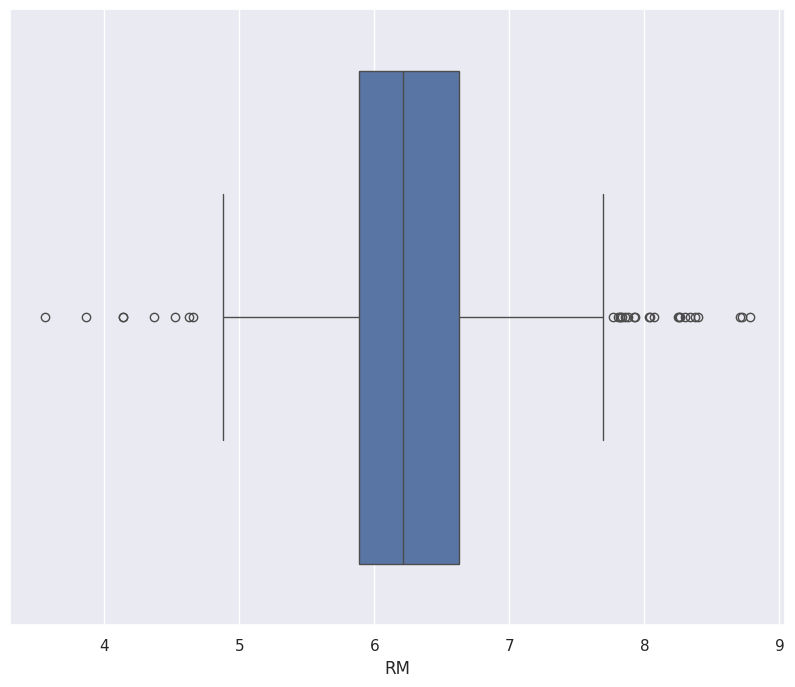

In [28]:
sns.boxplot(x=df['RM'])

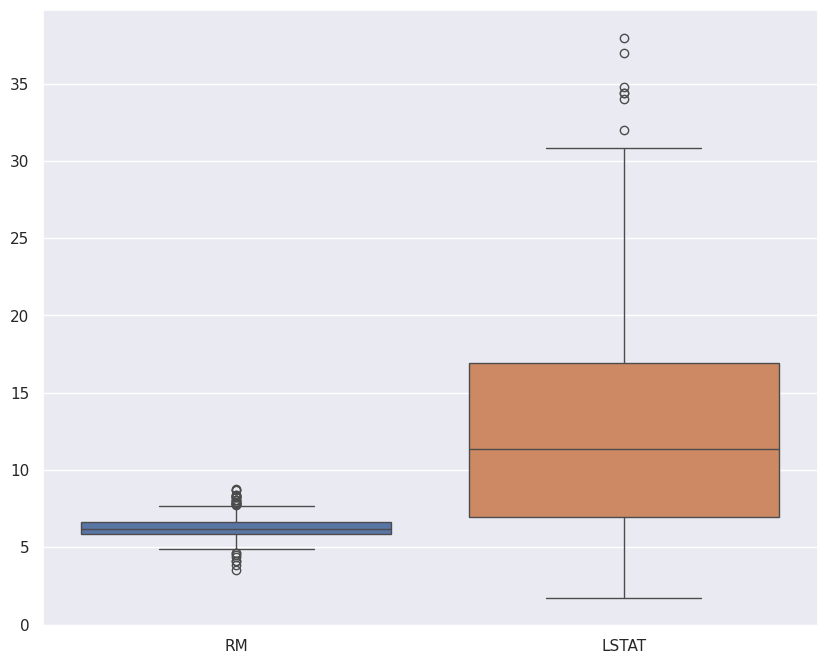

In [29]:
sns.boxplot([df['RM'],df['LSTAT']]);

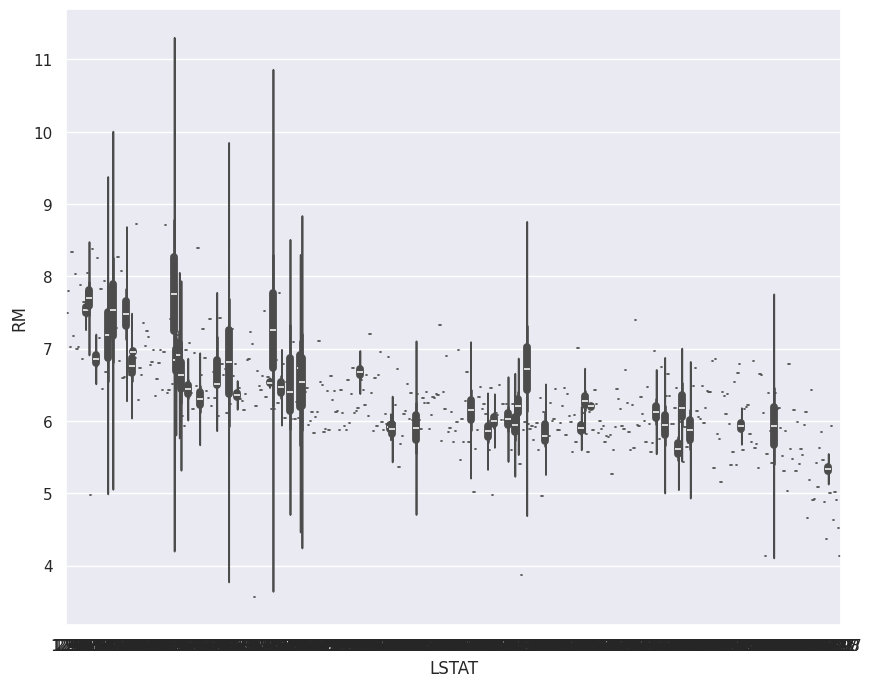

In [31]:
sns.violinplot(x='LSTAT',y='RM',data=df);# her markanın grafiği çiziyor data nasıl dağıltını anlatır

In [36]:
px.bar(df,x='MEDV',y='RM',color='CHAS') # Change the value of color to a valid column name in the DataFrame.


### **Feature Engineering**

In [40]:
df.corr(numeric_only=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [45]:
x = df[['LSTAT', 'RM']]
y = df[['MEDV']]

In [81]:
model=lr.fit(x_train,y_train) #makine öğrenmesi yapıyor

In [82]:
tahmin=model.predict(x_test) #tahmin yapıyor

In [46]:
x_train,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.20,random_state=42)


In [51]:
x_train.shape ,x_test.shape

((404, 2), (102, 2))

In [52]:
lr=LinearRegression()
R= Ridge()
L=Lasso()
E=ElasticNet()



In [63]:
# Çoklu Doğrusal Regresyon modeli oluştur
model = LinearRegression()

# Eğitim setlerini kullanarak modeli eğit
model.fit(x_train,y_train)

LinearRegression()

In [64]:
# Eğitim seti için değerlendirme
y_train_predict = model.predict(x_train)
# rmse & r2 puanı
rmse = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2 = r2_score(y_train,y_train_predict)
print(f"kök ortalama kare hatası: {rmse}")
print(f"R-kare puanı : {r2}")

kök ortalama kare hatası: 5.512880843371696
R-kare puanı : 0.6501592679428922


In [65]:
# Test seti için değerlendirme
y_pred_test = model.predict(x_test)
# rmse & r2 puanı
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
r2 = r2_score(y_test,y_pred_test)
print(f"kök ortalama kare hatası: {rmse}")
print(f"R-kare puanı : {r2}")

kök ortalama kare hatası: 5.5895698047151745
R-kare puanı : 0.5739577415025858


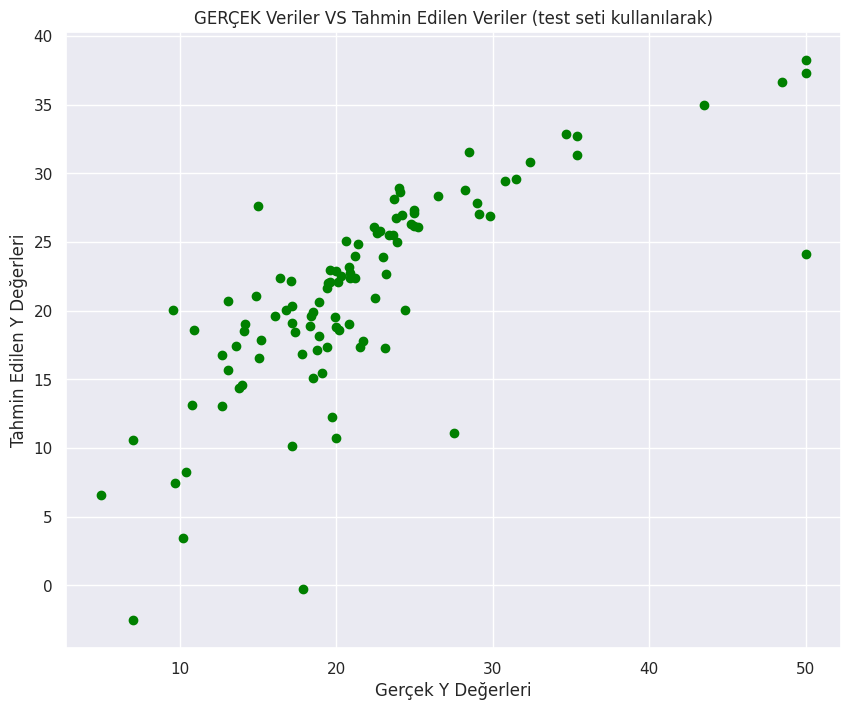

In [66]:
# Gerçek VS tahmin edilen verileri görselleştirin
plt.figure(figsize=(10,8))
plt.scatter(x= y_test, y=y_pred_test,color = 'green')

min_val = (min(y_test)) # y_test ile y_pred arasındaki minimum değeri bulun
max_val = (max(y_test)) # y_test ile y_pred arasındaki maksimum değeri bulun
plt.title('GERÇEK Veriler VS Tahmin Edilen Veriler (test seti kullanılarak)')
plt.xlabel('Gerçek Y Değerleri')
plt.ylabel('Tahmin Edilen Y Değerleri')
plt.show()

In [70]:
Rmodel=R.fit(x_train,y_train)
tahmin2=Rmodel.predict(x_test)
mean_squared_error(y_test,tahmin2)**.9  # root mean squared error hata

r2_score (y_test,tahmin2)

0.5746078496530475

In [71]:
Lmodel=L.fit(x_train,y_train)
tahmin3=Lmodel.predict(x_test)
mean_squared_error(y_test,tahmin3)**.9  # root mean squared error hata
r2_score (y_test,tahmin3)






0.5872038679008809

In [72]:
Emodel=E.fit(x_train,y_train)
tahmin4=Emodel.predict(x_test)
mean_squared_error(y_test,tahmin4)**.9
r2_score (y_test,tahmin4)


0.5769813100146475

In [74]:
# Fit the LinearRegression model to your training data first
lr.fit(x_train, y_train)

# Now you can access the coef_ attribute
lr.coef_

array([[-0.63249856,  5.46509877]])

In [75]:
feature_importance =pd.DataFrame({'Feature':x_train.columns,'Coefs':lr.coef_[0]})

In [76]:
feature_importance = feature_importance.sort_values(by='Coefs',ascending=False)

In [77]:
feature_importance

,Feature,Coefs
1,RM,5.465099
0,LSTAT,-0.632499


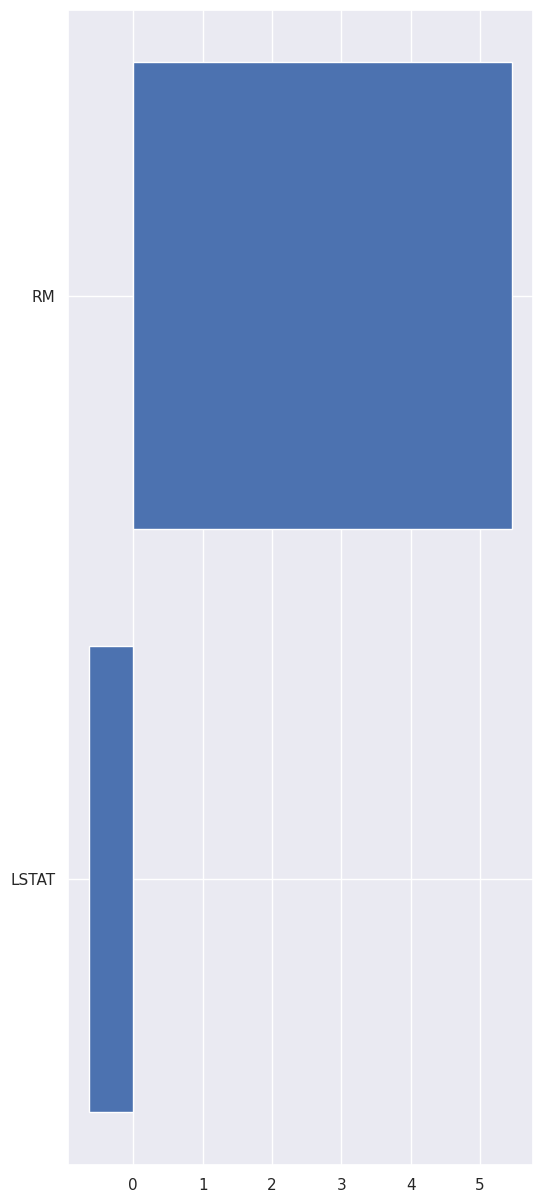

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Coefs']);

plt.gca().invert_yaxis()# burda 4 olanlar sağ - değerler sol yapar

## **# Regression da başarı oranı için bilinmesi gerekenler
1-R2_score>0.85
2-düşük  RMSE
3:Residuals should follow normal distribution**

In [83]:
residulas=y_test-tahmin

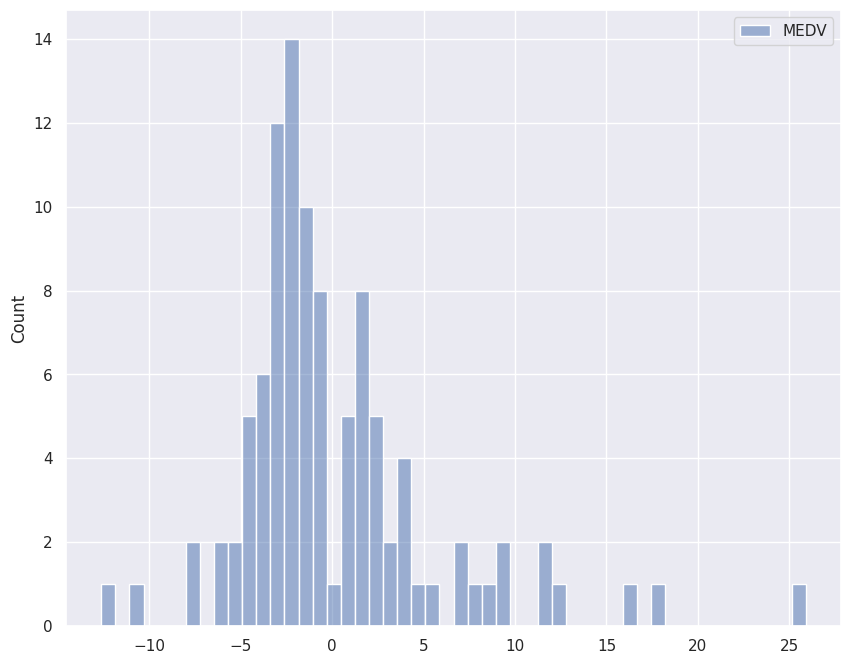

In [84]:
sns.histplot(residulas,bins=50); # başarı oranı his grafiği göstermesi en çok veriler ortada olunca o zaman doğru eğitim yaptık

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
dt=DecisionTreeRegressor()

In [89]:
Domdel=dt.fit(x_train,y_train)

In [90]:
tahmin5=dt.predict(x_test)

In [91]:
mean_squared_error(y_test,tahmin5)**0.5

6.881525423687886

In [92]:
r2_score(y_test,tahmin5)

0.3542486134482662

In [93]:
from sklearn.ensemble import ExtraTreesRegressor # lineer olmayan

In [94]:
ET=ExtraTreesRegressor()

In [95]:
ETmodel=ET.fit(x_train,y_train)

In [96]:
tahmin6=ET.predict(x_test)

In [97]:
mean_squared_error(y_test,tahmin6)**0.5

5.113972381584382

In [101]:
r2_score(y_test,tahmin6)

0.6433742759127461